# Visualizing The Gender Gap In College Degrees

## Introduction

In this project we analyze a dataset which contains the percentage of female bachelor's graduates at US institutions among 17 different majors and across the academic years 1970-71 to 2011-12. The final goal is to visualize the data by creating a comprehensive picture which shows how this percentage has evolved over the given period of time and across all given majors.

## About the Data

The original data was released by The Department of Education Statistics in their [2013 Digest](https://nces.ed.gov/programs/digest/2013menu_tables.asp); this contains many tables with a ton of different information about the US students' population. Here, however, we will use a leaner version of the dataset, one that was compiled by Randal Olson, a data scientist based in Portland, and which he made available [on his blog](http://www.randalolson.com/2014/06/14/percentage-of-bachelors-degrees-conferred-to-women-by-major-1970-2012/). 

## Read-in the Dataset

We are ready to import the necessary libraries, set the correct commands and take a look at the dataset.

In [1]:
# Import the necessary libraries and commands
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
# Read in the CSV file with the dataset
women_degrees = pd.read_csv("percent-bachelors-degrees-women-usa.csv")

In [3]:
# Print the first and last five rows
women_degrees.head()
women_degrees.tail()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
37,2007,47.605026,43.100459,61.4,59.411993,49.000459,62.5,17.6,78.721413,16.8,67.874923,70.2,85.4,44.1,40.7,77.1,82.1,49.3
38,2008,47.570834,42.711730,60.7,59.305765,48.888027,62.4,17.8,79.196327,16.5,67.594028,70.2,85.2,43.3,40.7,77.2,81.7,49.4
39,2009,48.667224,43.348921,61.0,58.489583,48.840474,62.8,18.1,79.532909,16.8,67.969792,69.3,85.1,43.3,40.7,77.1,82.0,49.4
40,2010,48.730042,42.066721,61.3,59.010255,48.757988,62.5,17.6,79.618625,17.2,67.928106,69.0,85.0,43.1,40.2,77.0,81.7,49.3
41,2011,50.037182,42.773438,61.2,58.742397,48.180418,62.2,18.2,79.432812,17.5,68.426730,69.5,84.8,43.1,40.1,76.7,81.9,49.2


It's very easy to recognize the structure of the dataset: each row corresponds to a different academic year, the first column specifies when the academic year has started and every other column corresponds to a different major. As explained in the introduction, the values in these columns represent the percentage of bachelor's degree (in the corresponding major) that were assigned nationally to women.

Note that, given the current data, the percentage of bachelor's degree in a certain major assigned to men during a certain year can be easily calculated: it's enough to find in the dataframe the value for women graduates corresponding to the given (year, major) and subtracting this number to 100.    

## Grouping Majors into Categories

To make our data visualization more organized, we divide the majors into different categories. More specifically, we will use the following categories: STEM, Liberal Arts and Other.

In [4]:
# Divide majors into STEM, Liberal Arts and Other majors
stem_cats = ["Psychology", "Biology", "Math and Statistics", "Physical Sciences", "Computer Science", "Engineering"]
lib_arts_cats = ["Foreign Languages", "English", "Communications and Journalism", "Art and Performance", "Social Sciences and History"]
other_cats = ["Health Professions", "Public Administration", "Education", "Agriculture", "Business", "Architecture"]

cats = [stem_cats, lib_arts_cats, other_cats]

For each major, we want to create graphs showing the percentages of men and women graduates across the years. Moreover, within each category, we want to order the graphs by the pecentage of degrees awarded to women in the most recent year (2011) (the majors with highest women graduates will appear on top). So let's start reordering the majors inside each category.  

In [5]:
# Rearrange the majors in each category following the percentage of women graduates in 2011 in descending order
for cat in cats:
    cat = list(women_degrees.iloc[-1][cat].sort_values(ascending = False).index)

## Visualizing the Data

Now we are ready to create our graph.

In [6]:
# Set colors to use
blue = "#0000ff"   # Blue for men
pink = "#ff9999"   # Pink for women 
grey = "#ababab"   # Grey for other elements

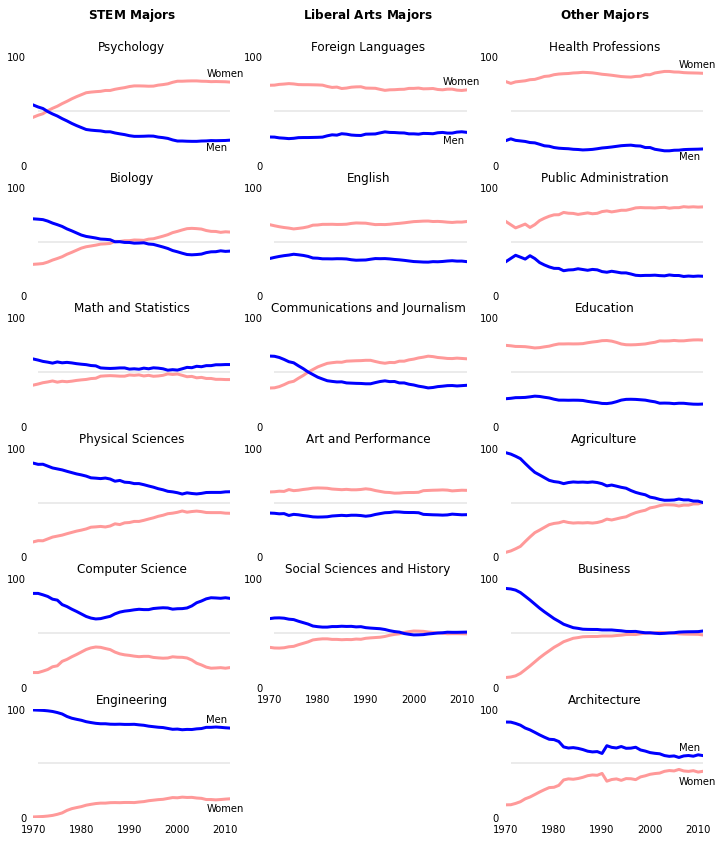

In [7]:
fig = plt.figure(figsize=(12, 14))

# Draw STEM plots
for i in range(0, 6):
    # Create plot
    ax = fig.add_subplot(6, 3, 3*i + 1)
    # Draw line for women data
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[i]], color = pink, linewidth = 3)
    # Draw line for men data
    ax.plot(women_degrees["Year"], 100 - women_degrees[stem_cats[i]], color = blue, linewidth = 3)
    # Draw middle line
    ax.hlines(50, 1971, 2011, color = grey, alpha=0.3) # alpha parameter makes color more transparent
    # Set the name of the major as the title
    ax.set_title(stem_cats[i])
    # Set range of the axis
    ax.set_xlim(1971, 2011)
    ax.set_ylim(0,100)
    # Remove ticks from all axis
    ax.tick_params(bottom = False, left = False)
    # Set the ticks labels
    ax.set_yticks([0, 100]) # we only draw the empty and full percentage
    ax.set_xticks([1970, 1980, 1990, 2000, 2010]) # we only draw the year at the beginning of each decade  
    # Remove the plot's spines
    for key, sp in ax.spines.items():
        sp.set_visible(False)
    # Draw x-axis tick labels only on the bottom plot
    if i != 5:
        ax.tick_params(labelbottom = False)
    # On the top plot draw a label above or beyond each line specifying to which gender it refers
    # Also, add an extra line to the title specifying what category of majors the column refers to
    if i == 0:
        ax.set_title(r"$\bf{STEM \ Majors}$" + "\n\n" + stem_cats[0])
        ax.text(women_degrees.iloc[-1]["Year"] - 5, women_degrees.iloc[-1][stem_cats[i]] + 5, "Women")
        ax.text(women_degrees.iloc[-1]["Year"] - 5, 100 - women_degrees.iloc[-1][stem_cats[i]] - 10, "Men")
    # Do the same for the bottom plot
    elif i == 5:
        ax.text(women_degrees.iloc[-1]["Year"] - 5, women_degrees.iloc[-1][stem_cats[i]] - 12, "Women")
        ax.text(women_degrees.at[41, "Year"] - 5, 100 - women_degrees.iloc[-1][stem_cats[i]] + 5, "Men")
        
        
# Draw Liberal Arts plots        
for i in range(0, 5):
    # Create plot
    ax = fig.add_subplot(6, 3, 3*i + 2)
    # Draw line for women data
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_cats[i]], color = pink, linewidth = 3)
    # Draw line for men data
    ax.plot(women_degrees["Year"], 100 - women_degrees[lib_arts_cats[i]], color = blue, linewidth = 3)
    # Draw middle line
    ax.hlines(50, 1971, 2011, color = grey, alpha=0.3)
    # Set the name of the major as the title
    ax.set_title(lib_arts_cats[i])
    # Set range of the axis
    ax.set_xlim(1971, 2011)
    ax.set_ylim(0,100)
    # Remove ticks from all axis
    ax.tick_params(bottom = False, left = False)
    # Set the ticks labels
    ax.set_yticks([0, 100])
    ax.set_xticks([1970, 1980, 1990, 2000, 2010]) 
    # Remove the plot's spines
    for key, sp in ax.spines.items():
        sp.set_visible(False)
    # Draw x-axis tick labels only on the bottom plot    
    if i != 4:
        ax.tick_params(labelbottom = False)
    # On the top plot draw a label above or beyond each line specifying to which gender it refers
    # Also, add an extra line to the title specifying what category of majors the column refers to
    if i == 0:
        ax.set_title(r"$\bf{Liberal \ Arts \ Majors}$" + "\n\n" + lib_arts_cats[0])
        ax.text(women_degrees.iloc[-1]["Year"] - 5, women_degrees.iloc[-1][lib_arts_cats[i]] + 5, "Women")
        ax.text(women_degrees.iloc[-1]["Year"] - 5, 100 - women_degrees.iloc[-1][lib_arts_cats[i]] - 10, "Men")
        
        
# Draw Other plots        
for i in range(0, 6):
    # Create plot
    ax = fig.add_subplot(6, 3, 3*i + 3)
     # Draw line for women data
    ax.plot(women_degrees["Year"], women_degrees[other_cats[i]], color = pink, linewidth = 3)
     # Draw line for men data
    ax.plot(women_degrees["Year"], 100 - women_degrees[other_cats[i]], color = blue, linewidth = 3)
    # Draw middle line
    ax.hlines(50, 1971, 2011, colors = (171/255, 171/255, 171/255), alpha=0.3)
    # Set the name of the major as the title
    ax.set_title(other_cats[i])
    # Set range of the axis
    ax.set_xlim(1971, 2011)
    ax.set_ylim(0,100)
    # Remove ticks from all axis
    ax.tick_params(bottom = False, left = False)
    # Set the ticks labels
    ax.set_yticks([0, 100])
    ax.set_xticks([1970, 1980, 1990, 2000, 2010]) 
    # Remove the plot's spines
    for key, sp in ax.spines.items():
        sp.set_visible(False)
    # Draw x-axis tick labels only on the bottom plot    
    if i != 5:
        ax.tick_params(labelbottom = False)
    # On the top plot draw a label above or beyond each line specifying to which gender it refers
    # Also, add an extra line to the title specifying what category of majors the column refers to
    if i == 0:
        ax.set_title(r"$\bf{Other \ Majors}$" + "\n\n" + other_cats[0])
        ax.text(women_degrees.iloc[-1]["Year"] - 5, women_degrees.iloc[-1][other_cats[i]] + 5, "Women")
        ax.text(women_degrees.iloc[-1]["Year"] - 5, 100 - women_degrees.iloc[-1][other_cats[i]] - 10, "Men")
    # Do the same for the bottom plot
    elif i == 5:
        ax.text(women_degrees.iloc[-1]["Year"] - 5, women_degrees.iloc[-1][other_cats[i]] - 12, "Women")
        ax.text(women_degrees.iloc[-1]["Year"] - 5, 100 - women_degrees.iloc[-1][other_cats[i]] + 5, "Men")

# Save picture and draw graphics        
plt.savefig("gender_degrees.png")        
plt.show();

## Observations

We observe how most of the STEM majors are historically (and still to these days) largely dominated by men even if the number of female graduates has steadily risen over the last decades. The only exception are *Psychology* (which, for what it's worth, is not always considered a STEM discipline) and *Biology*, where the number of women graduates exceeded men by the end of the 80s. 

In the Liberal Arts category all majors (apart from *Social Sciences and History* where the situation is very balanced) have a stronger female participation and it seems like, during the course of time, the gender gap has been for the most part stable.

For the other majors the scene is quite mixed: *Health Professions*, *Public Administration* and *Education* have had an overwhelming majority of female graduates throughout the entire period of time considered; *Agriculture*, *Business* and *Architecture*, on the other hand, are predominantly male but have witnessed a big surge in women graduates which helped to almost entirely close the gap.